In [1]:
# This is the datascience module from Berkeley
# https://github.com/data-8/datascience

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'
full = Table.read_table(url)
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


In [5]:
us_pop = full.select(0, 1, 4, 9)
us_pop

SEX,AGE,POPESTIMATE2010,POPESTIMATE2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [6]:
us_pop_2015 = us_pop.drop(2)
us_pop_2015

SEX,AGE,POPESTIMATE2015
0,0,3978038
0,1,3968564
0,2,3966583
0,3,3974061
0,4,4020035
0,5,4018158
0,6,4019207
0,7,4148360
0,8,4167887
0,9,4133564


In [7]:
us_pop_2015 = us_pop_2015.where('AGE', are.below(999)).where('SEX', are.not_equal_to(0))
us_pop_2015

SEX,AGE,POPESTIMATE2015
1,0,2035134
1,1,2029295
1,2,2026604
1,3,2030644
1,4,2055924
1,5,2050848
1,6,2050663
1,7,2117118
1,8,2128825
1,9,2111678


In [8]:
us_pop_2015.relabel(2, '2015').set_format(2, NumberFormatter)

SEX,AGE,2015
1,0,"2,035,134"
1,1,"2,029,295"
1,2,"2,026,604"
1,3,"2,030,644"
1,4,"2,055,924"
1,5,"2,050,848"
1,6,"2,050,663"
1,7,"2,117,118"
1,8,"2,128,825"
1,9,"2,111,678"


In [9]:
sum(us_pop_2015.column('2015'))

321418820

In [21]:
males = us_pop_2015.where('SEX', 1).column(2)
print(males[:5])
len(males)

[2035134 2029295 2026604 2030644 2055924]


101

In [22]:
females = us_pop_2015.where('SEX', 2).column(2)
print(females[:5])
len(females)

[1942904 1939269 1939979 1943417 1964111]


101

In [27]:
by_sex = us_pop_2015.where('SEX', 1).drop('SEX').relabel('2015', 'Males').with_column(
  'Females', females
).set_format(2, NumberFormatter)
by_sex

AGE,Males,Females
0,"2,035,134","1,942,904"
1,"2,029,295","1,939,269"
2,"2,026,604","1,939,979"
3,"2,030,644","1,943,417"
4,"2,055,924","1,964,111"
5,"2,050,848","1,967,310"
6,"2,050,663","1,968,544"
7,"2,117,118","2,031,242"
8,"2,128,825","2,039,062"
9,"2,111,678","2,021,886"


In [28]:
male_female_ratio = by_sex.column('Males') / by_sex.column('Females')
male_female_ratio[:15]

array([1.04747018, 1.04642265, 1.04465255, 1.04488332, 1.04674532,
       1.04246306, 1.0417156 , 1.04227758, 1.04402171, 1.04441002,
       1.0429262 , 1.04109339, 1.04006435, 1.04051854, 1.04248165])

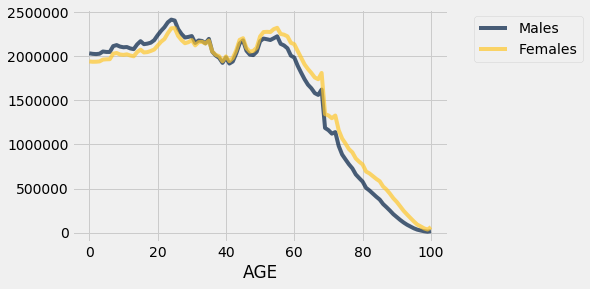

In [29]:
by_sex.plot('AGE')

In [31]:
# About 36 years where the ratio is less then one
# so there are more female than male
by_sex.with_column(
    'Male Female ratio', male_female_ratio
).show()

AGE,Males,Females,Male Female ratio
0,"2,035,134","1,942,904",1.04747
1,"2,029,295","1,939,269",1.04642
2,"2,026,604","1,939,979",1.04465
3,"2,030,644","1,943,417",1.04488
4,"2,055,924","1,964,111",1.04675
5,"2,050,848","1,967,310",1.04246
6,"2,050,663","1,968,544",1.04172
7,"2,117,118","2,031,242",1.04228
8,"2,128,825","2,039,062",1.04402
9,"2,111,678","2,021,886",1.04441
